# Kaggle Pokemon Best Team with Data Science

In [118]:
!pip install yellowbrick

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

In [120]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [121]:
df = pd.read_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/06. Kaggle/02. KaggleYouTubeProject_Pokemon/Pokemon.csv')

In [122]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# EDA

In [123]:
df.describe(include='object')

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [125]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [126]:
features_continuous = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
features_category = ['Type 1', 'Type 2', 'Generation', 'Legendary']
features_id = ['#', 'Name']

# Univariate Analysis

### Distribution of continuous

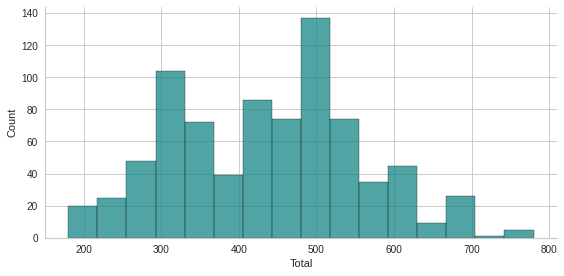

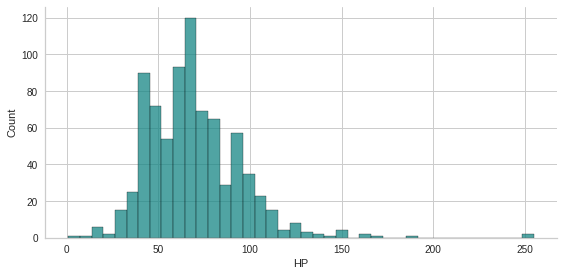

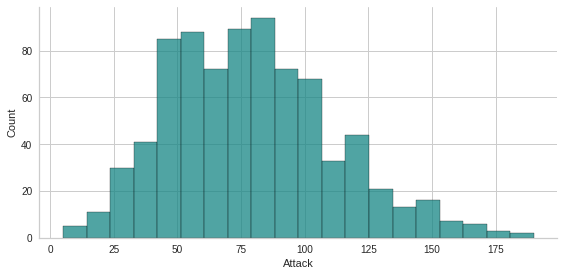

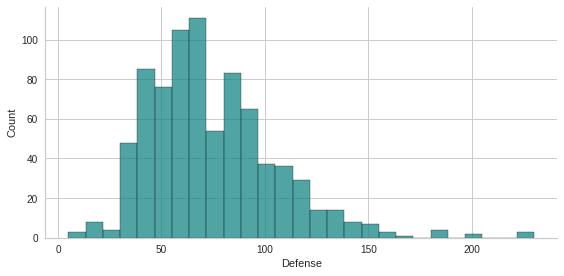

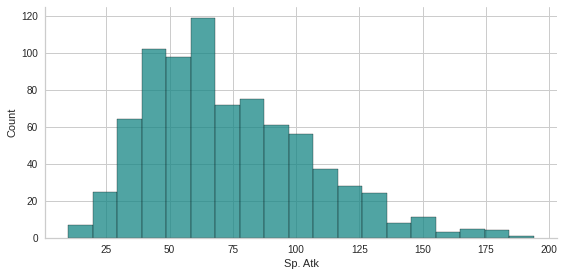

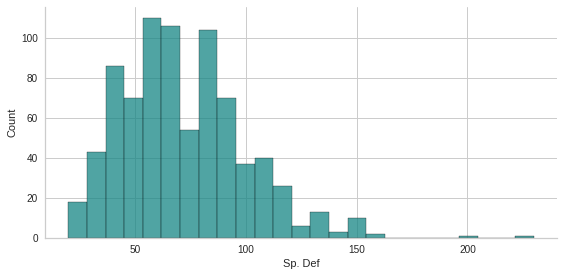

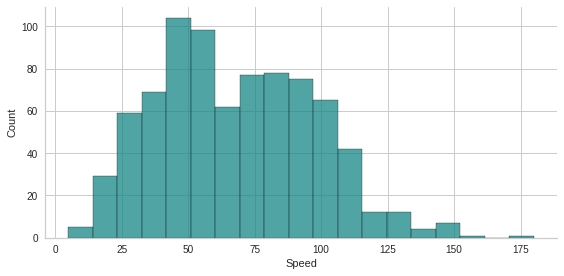

In [127]:
for feature in features_continuous:
  sns.displot(data=df, x=feature, height=4, aspect=2, color='#158685')

### Distribution of categories

In [128]:
features_category

['Type 1', 'Type 2', 'Generation', 'Legendary']

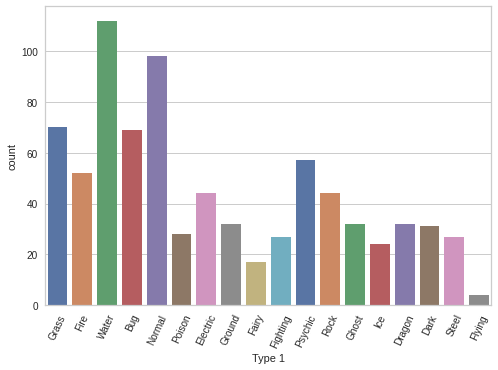

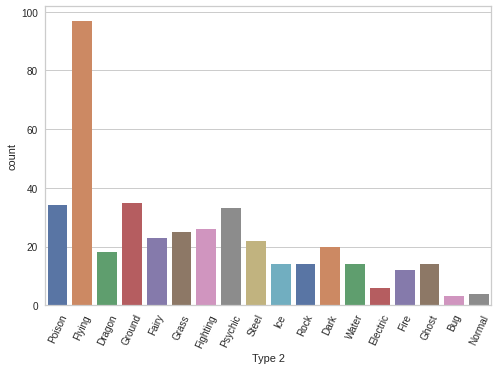

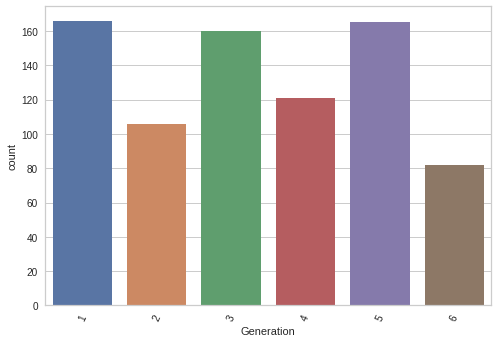

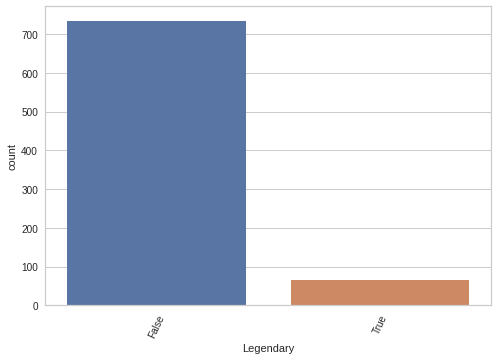

In [129]:
for feature in features_category:
  sns.countplot(data=df, x=feature, palette='deep')
  plt.xticks(rotation=65)
  plt.show()

***Observations Categories:***

+ Type 1: Flying occurs very little.  Most common being Water.
+ Type 2: Bug and Normal occur very little.  Most common is Flying.
+ Generation: Fewest pokemon are from the 6 the season.  With the 1st, 3rd and 5th generation providing the most diversified generation. 

# Bivariate Analysis

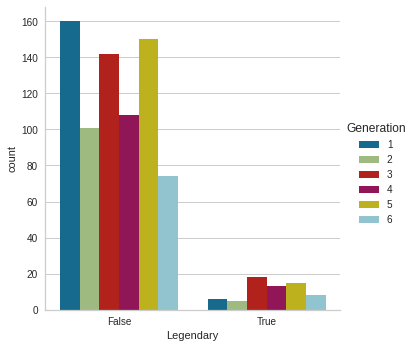

In [130]:
sns.catplot(data=df, x='Legendary', hue='Generation', kind='count')

**Oberservations:** 

+ Generation 3 has the highest count of legendaries
+ Generation 1 has the lowest

'Legendary'

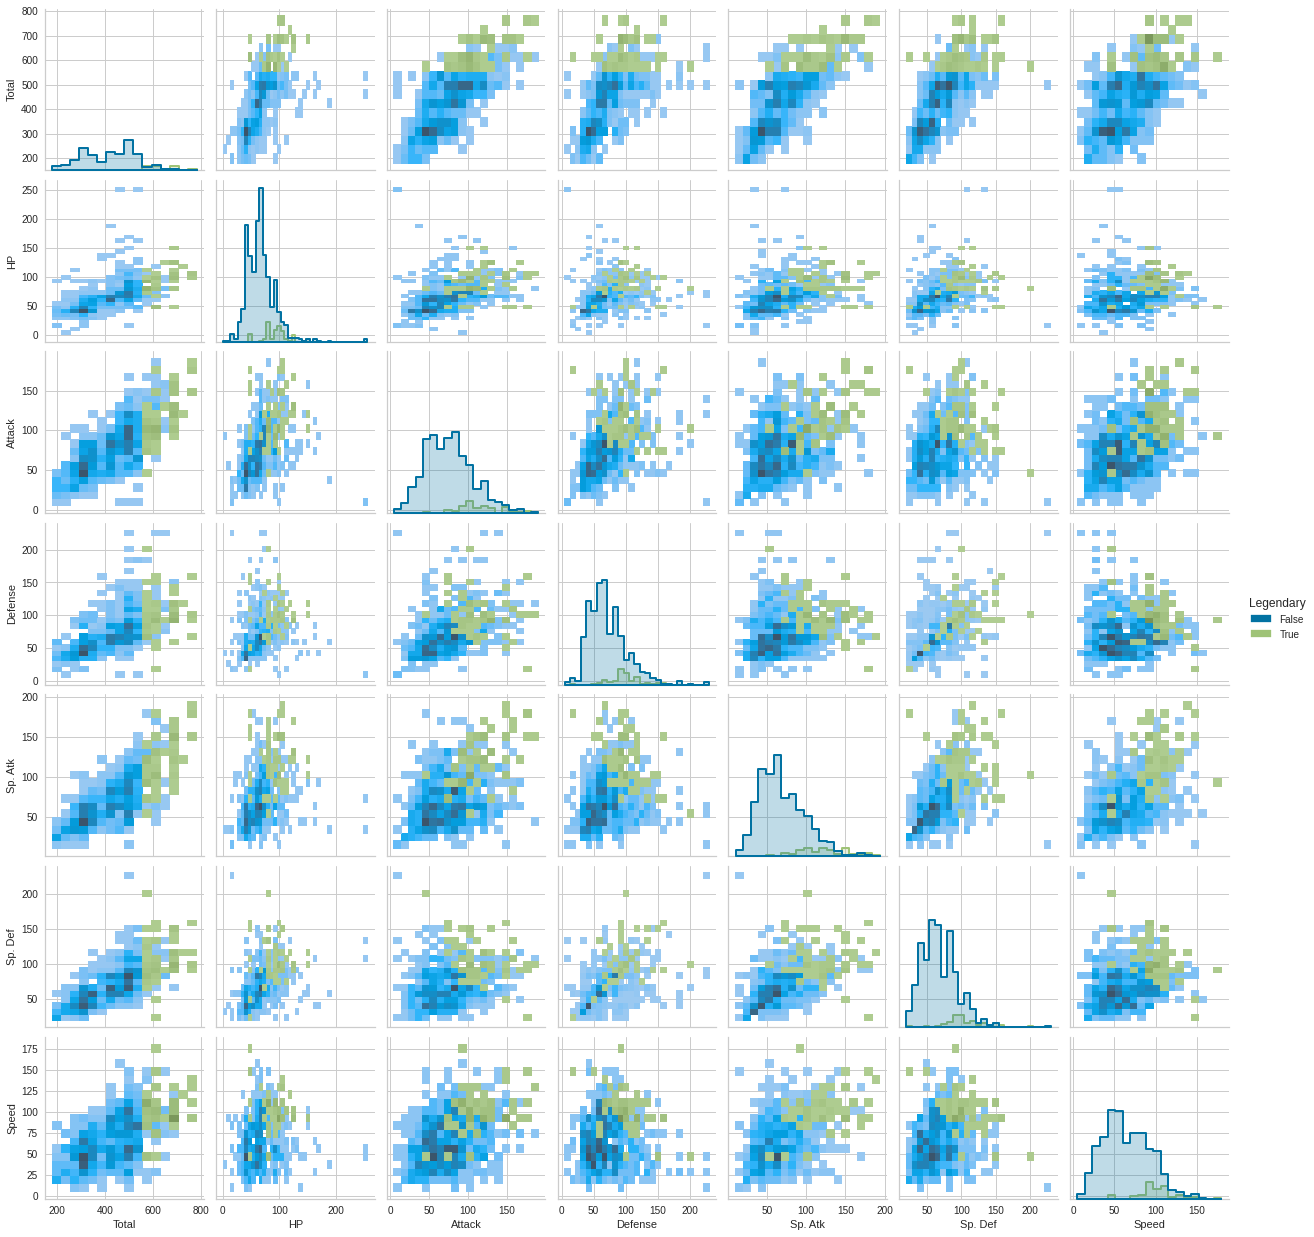

In [131]:
features_continuous.append('Legendary')
sns.pairplot(data=df[features_continuous], hue='Legendary', kind='hist',diag_kind='hist', diag_kws={'element':'step',
                                                                                                    'fill':True,
                                                                                                    'stat':'density',
                                                                                                    'linewidth':2
                                                                                                    })#
features_continuous.pop()

### Observation:

+ Generation 3 has the most Lengendary Pokemon
  + 2 has the least
+ All stats appear to have similar characteristic, each stats holds outliers
+ Legendary status has general increasing effect across all stats


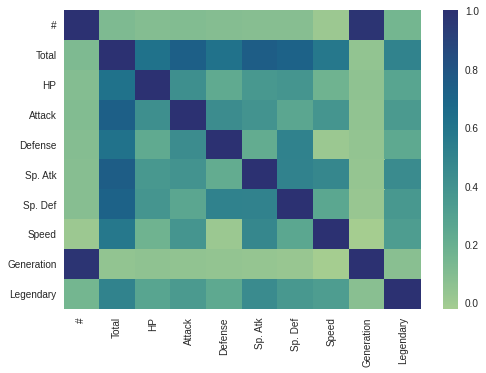

In [132]:
sns.heatmap(df.corr(), cmap='crest')

**Oberservations:**

+ Total has high correlation with Defense and HP
  + Total has moderate correlation with Speed
+ Sp. Atk with Sp. Def and Speed show some correlation
+ Generation has very low correlation with any stat

# Outlier Inspection

### By Generation

In [133]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

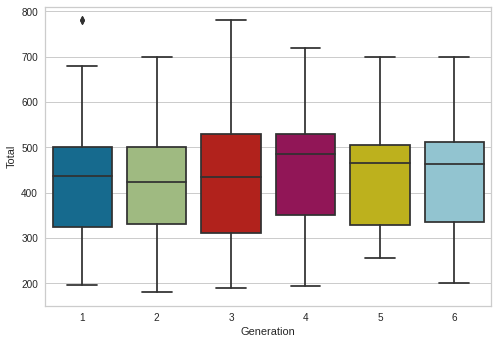

In [134]:
sns.boxplot(data=df, y='Total', x='Generation')

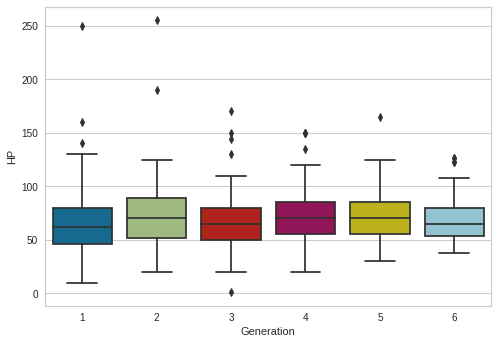

In [135]:
sns.boxplot(data=df, y='HP', x='Generation')

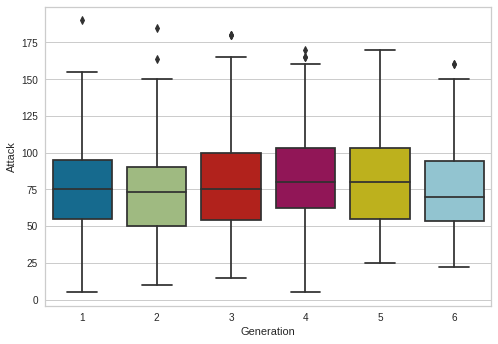

In [136]:
sns.boxplot(data=df, y='Attack', x='Generation')

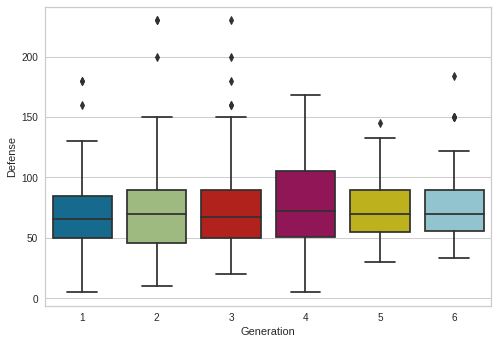

In [137]:
sns.boxplot(data=df, y='Defense', x='Generation')

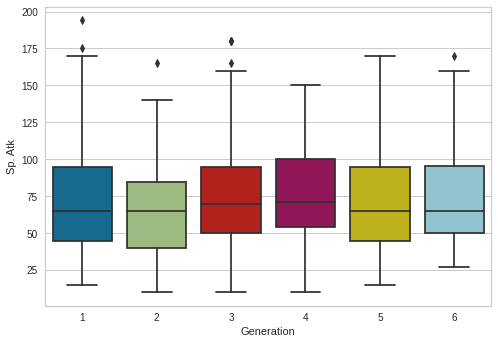

In [138]:
sns.boxplot(data=df, y='Sp. Atk', x='Generation')

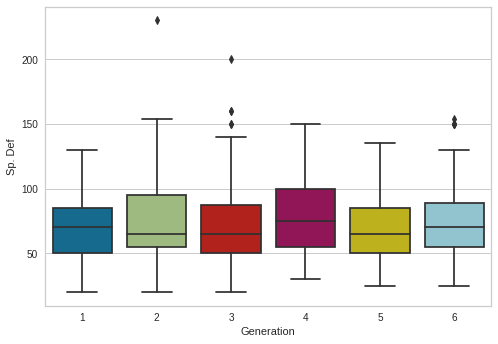

In [139]:
sns.boxplot(data=df, y='Sp. Def', x='Generation')

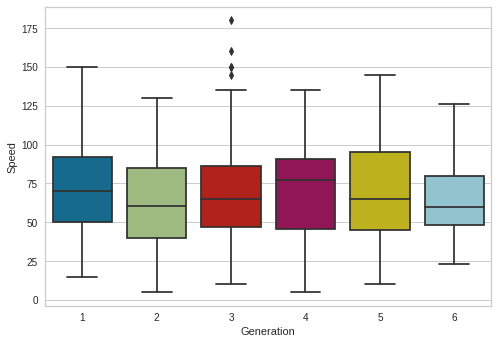

In [140]:
sns.boxplot(data=df, y='Speed', x='Generation')

### By Type 1

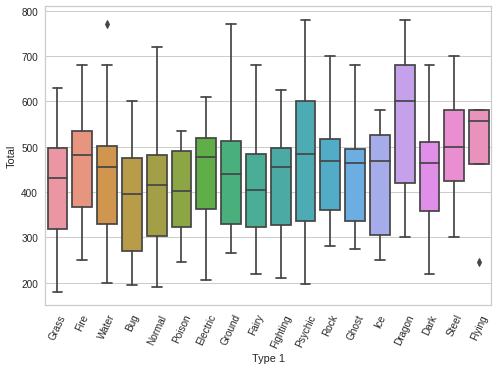

In [141]:
sns.boxplot(data=df, y='Total', x='Type 1')
plt.xticks(rotation=65)
plt.show()

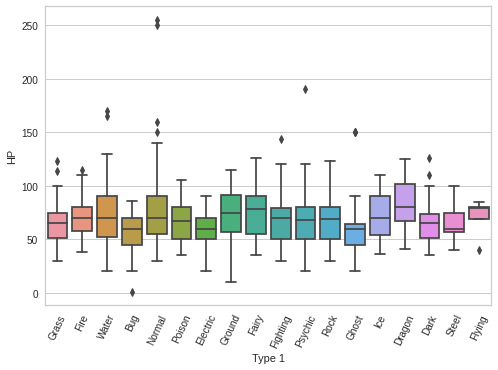

In [142]:
sns.boxplot(data=df, y='HP', x='Type 1')
plt.xticks(rotation=65)
plt.show()

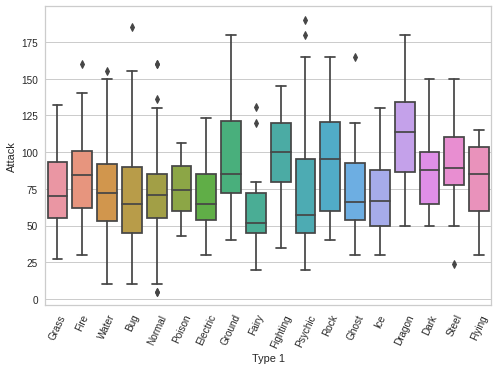

In [143]:
sns.boxplot(data=df, y='Attack', x='Type 1')
plt.xticks(rotation=65)
plt.show()

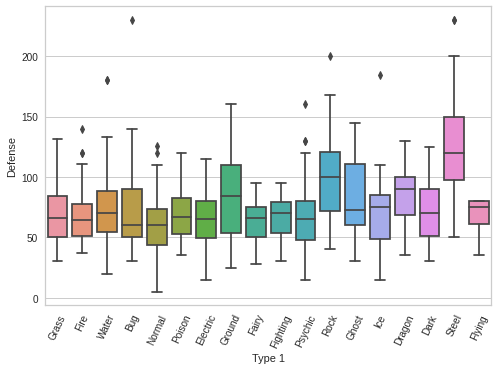

In [144]:
sns.boxplot(data=df, y='Defense', x='Type 1')
plt.xticks(rotation=65)
plt.show()

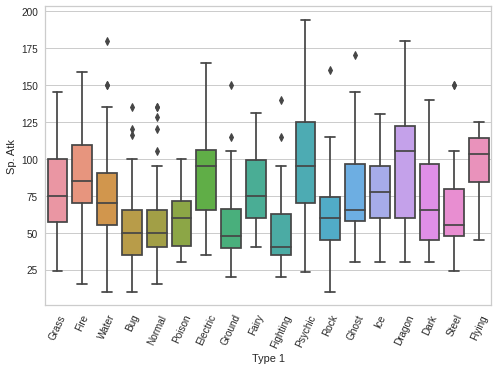

In [145]:
sns.boxplot(data=df, y='Sp. Atk', x='Type 1')
plt.xticks(rotation=65)
plt.show()

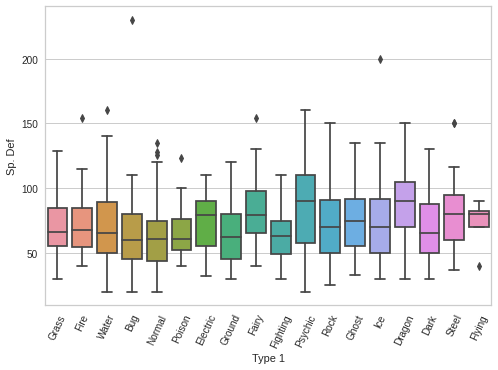

In [146]:
sns.boxplot(data=df, y='Sp. Def', x='Type 1')
plt.xticks(rotation=65)
plt.show()

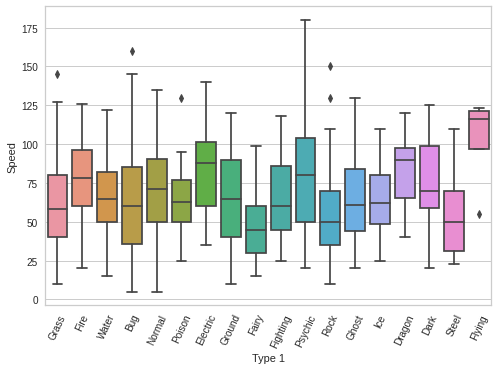

In [147]:
sns.boxplot(data=df, y='Speed', x='Type 1')
plt.xticks(rotation=65)
plt.show()

In [148]:
df[(df['Speed']<75) & (df['Type 1'] == 'Flying')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False


### By Type 2

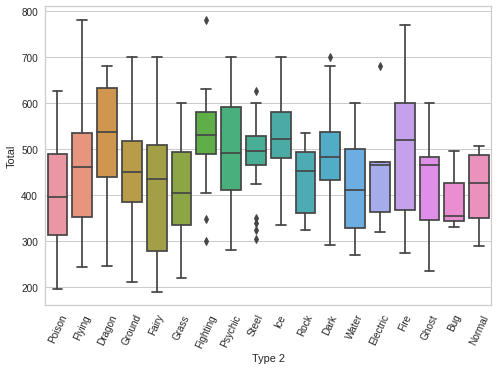

In [149]:
sns.boxplot(data=df, y='Total', x='Type 2')
plt.xticks(rotation=65)
plt.show()

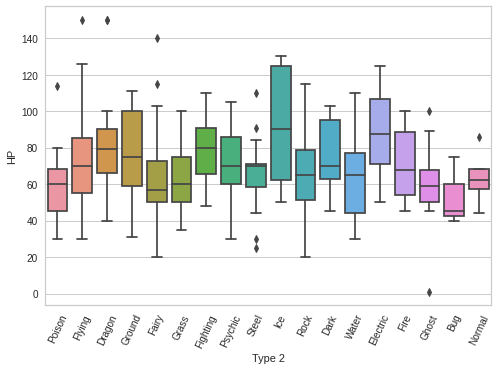

In [150]:
sns.boxplot(data=df, y='HP', x='Type 2')
plt.xticks(rotation=65)
plt.show()

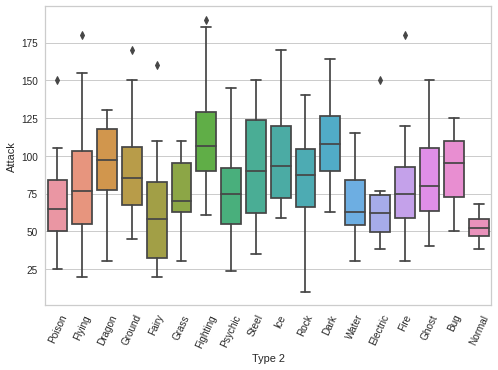

In [151]:
sns.boxplot(data=df, y='Attack', x='Type 2')
plt.xticks(rotation=65)
plt.show()

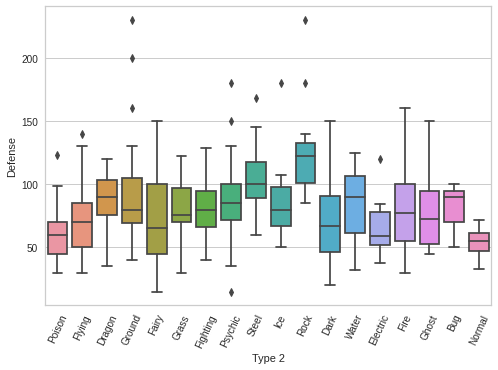

In [152]:
sns.boxplot(data=df, y='Defense', x='Type 2')
plt.xticks(rotation=65)
plt.show()

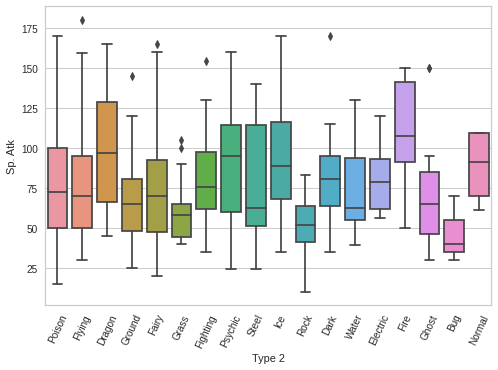

In [153]:
sns.boxplot(data=df, y='Sp. Atk', x='Type 2')
plt.xticks(rotation=65)
plt.show()

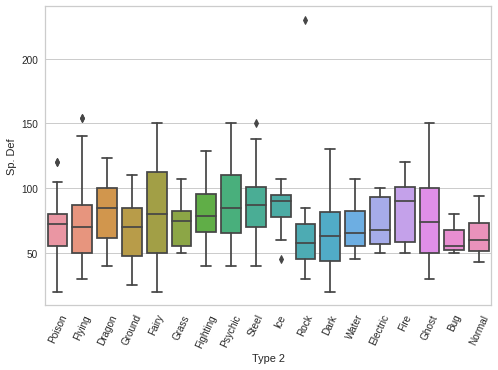

In [154]:
sns.boxplot(data=df, y='Sp. Def', x='Type 2')
plt.xticks(rotation=65)
plt.show()

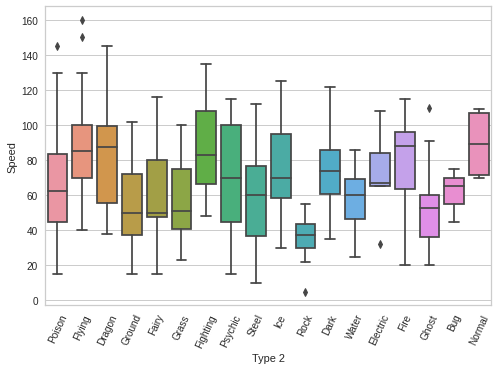

In [155]:
sns.boxplot(data=df, y='Speed', x='Type 2')
plt.xticks(rotation=65)
plt.show()

### By Generation

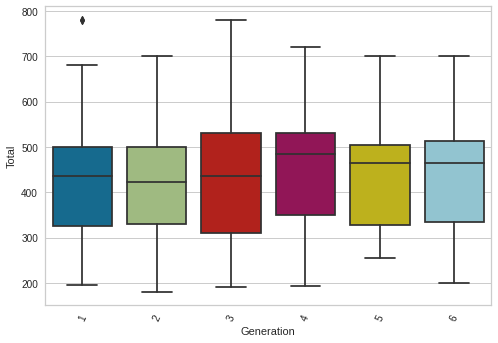

In [156]:
sns.boxplot(data=df, y='Total', x='Generation')
plt.xticks(rotation=65)
plt.show()

In [157]:
df[(df['Total']>750) & (df['Generation'] ==1)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


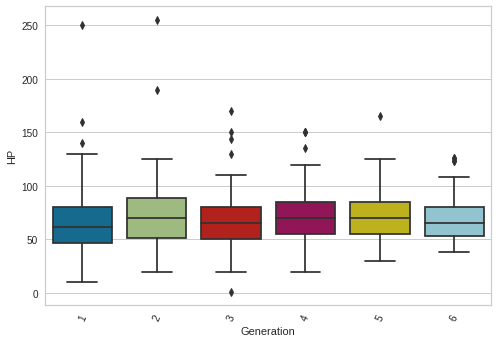

In [158]:
sns.boxplot(data=df, y='HP', x='Generation')
plt.xticks(rotation=65)
plt.show()

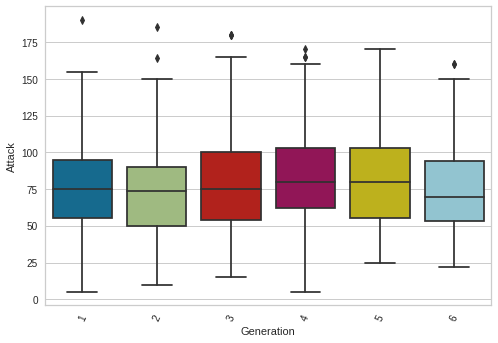

In [159]:
sns.boxplot(data=df, y='Attack', x='Generation')
plt.xticks(rotation=65)
plt.show()

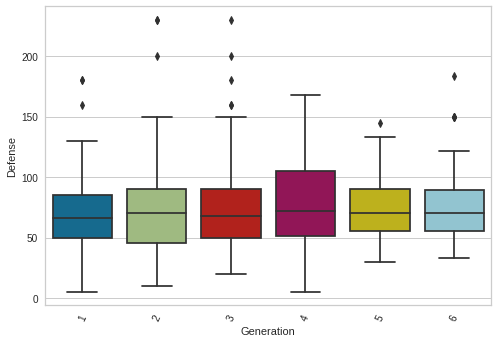

In [160]:
sns.boxplot(data=df, y='Defense', x='Generation')
plt.xticks(rotation=65)
plt.show()

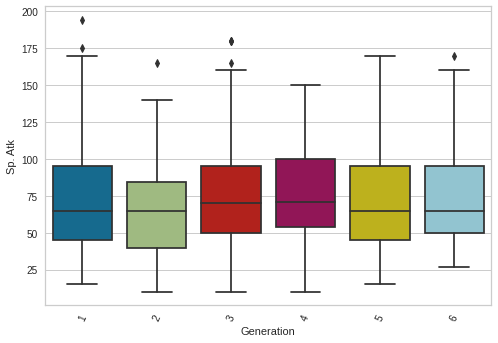

In [161]:
sns.boxplot(data=df, y='Sp. Atk', x='Generation')
plt.xticks(rotation=65)
plt.show()

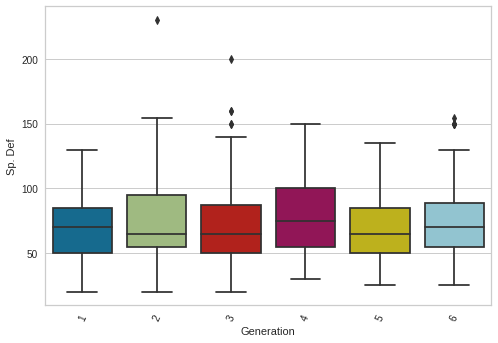

In [162]:
sns.boxplot(data=df, y='Sp. Def', x='Generation')
plt.xticks(rotation=65)
plt.show()

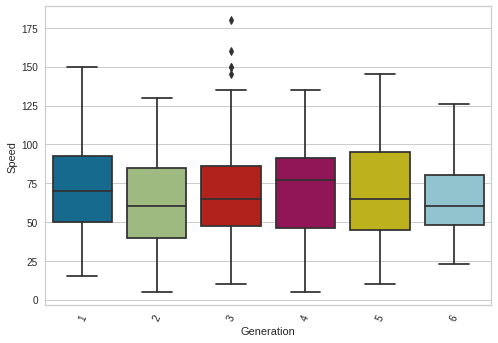

In [163]:
sns.boxplot(data=df, y='Speed', x='Generation')
plt.xticks(rotation=65)
plt.show()

# Preprocessing

## Filling Null

In [164]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [165]:
df['Type 2'] = df['Type 2'].fillna('None')

In [166]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

# Clustering Analysis

## Kmeans Clustering

In [ ]:
df.info()

In [ ]:
features_cluster = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']

### Mean Distortions and Elbow Method

In [ ]:
%%time
clusters = np.arange(1,50)
meanDistortions = []

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df[features_cluster])
    prediction=model.predict(df[features_cluster])
    meanDistortions.append(sum(np.min(cdist(df[features_cluster], model.cluster_centers_, 'euclidean'), axis=1)) / df[features_cluster].shape[0])

In [ ]:
sns.lineplot(clusters, meanDistortions, color='#4C876E')
plt.xlabel('k')
plt.ylabel('Average Distortions')
plt.title('Average distortions by k')

**Oberservations**

+ Attempting to use the elbow method reveals that because there is no evidence in the least of an inflection point. Therefore we can assume that every pokemon has a level of uniqueness.  
+ In other words **Every Pokemon is infact unique.**

### Silhouette Scores

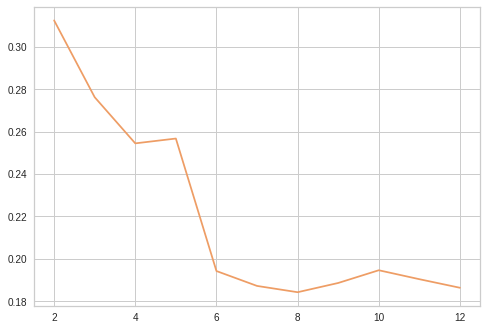

In [100]:
# plot of silouhette scores
sil_score = []
cluster_list = list(np.arange(2, 13))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((df[features_cluster]))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(df[features_cluster], preds)
    sil_score.append(score)

plt.plot(cluster_list, sil_score, color='#EE9D65')

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a1bfb4250>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=42))

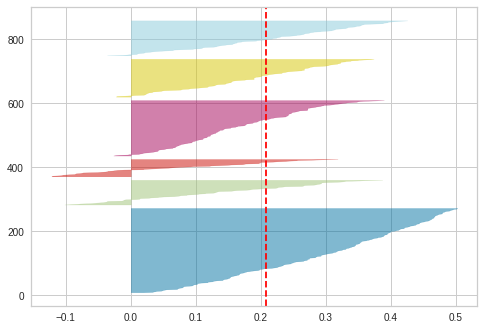

In [101]:
visualizer = SilhouetteVisualizer(KMeans(6,random_state=42), colors='yellowbrick')
visualizer.fit(df[features_cluster])

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(7,random_state=42), colors='yellowbrick')
visualizer.fit(df[features_cluster])

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(5,random_state=42), colors='yellowbrick')
visualizer.fit(df[features_cluster])

**Obervations:**

+ Using silhouette score we can can see that 6 clusters creates high silhouette scores.  Well beyond the average. 
+ 6 clusters will be used as the number of clusters or groupings of pokemon.

### InterCluster Distance

In [102]:
# trying 6 centers for Kmeans Clustering
kmeans = KMeans(n_clusters=6,
                 random_state=42)
kmeans.fit(df[features_cluster])

KMeans(n_clusters=6, random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


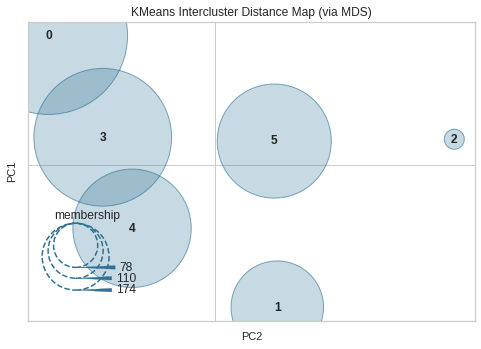

In [103]:
# Instantiate visualizer
visualizer_int_clust = InterclusterDistance(kmeans)
visualizer_int_clust.fit(df[features_cluster])        # Fit the data to the visualizer
visualizer_int_clust.show()

**Obeservations:**

+ 6 clusters using KMeans shows good intercluster distance.  Meaning that 6 clusters seperates the pokemon into reasonably distinct groups.

In [ ]:
# adding kmeans cluster labels to the original dataframe
df["K_means_clust"] = kmeans.labels_
df["K_means_clust"].head(2)

In [ ]:
features_cluster.append('K_means_clust')

In [ ]:
# assiging count for cluster profile
cluster_profile_km = df[features_cluster].groupby("K_means_clust").mean()
cluster_profile_km["count_in_each_clust"] = (
    df[features_cluster].groupby("K_means_clust")['Attack'].count().values
)

### Loading Saved Clusters

In [ ]:
# df.to_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/06. Kaggle/02. KaggleYouTubeProject_Pokemon/Pokemon_clusters.csv', index=False)

In [ ]:
df_clust = pd.read_csv('/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/06. Kaggle/02. KaggleYouTubeProject_Pokemon/Pokemon_clusters.csv')

In [ ]:
df_clust.head(2)

In [ ]:
df_clust.shape

In [ ]:
features_cluster.append('Total')
features_cluster.append('Generation')
features_cluster.append('Legendary')

In [ ]:
df_clust[features_cluster].groupby('K_means_clust').mean().style.highlight_max(color="#4989A7", axis=0)

In [ ]:
df_clust[features_cluster].groupby('K_means_clust').median().style.highlight_max(color="#A26C2D", axis=0)

**Oberservations:**

+ From mean distortions We are not able to find klusters with the elbow method, 
 + implying that each pokemon is in fact unique.
+ Using the silhouette score we can see that after 6 clusters little value added in adding more clusters
+ Three clusters are similar in that they don't contain a max value
  + cluster 0 - weaklings - generally low stats
  + cluster 1 - legendarylike - highest attack
  + cluster 2 - stonewall - strongest defense by large margin
  + cluster 3 - ordinaries - mediocre across the board
  + cluster 4 - hiddensurprises - mediocre with high special
  + cluster 5 - strong - medium-high with high attack, go to pokemon

In [ ]:
df_clust['cluster_name'] = df_clust['K_means_clust'].replace([0,1,2,3,4,5], ['weaklings', 'legendarylike', 'stonewall', 'ordinaries', 'hiddensurprises', 'strong'])

In [ ]:
df_clust['cluster_name'].value_counts()

In [ ]:
df_clust[['cluster_name', 'Type 1']].value_counts()[df_clust[['cluster_name', 'Type 1']].value_counts()>5]

# Best Pokemon

## Total

In [ ]:
df_clust['std_stats'] = df_clust[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].std(axis=1)

In [ ]:
df_clust[df_clust['Legendary']==True].sort_values('Total', ascending=False).head(10).sort_values('std_stats').head()

In [ ]:
df_clust[df_clust['Legendary']==False].sort_values('Total', ascending=False).head(10).sort_values('std_stats').head()

**Best Team from Total**

Legendary:
+ Arceus
+ LatiasMega Latias
+ KyuremWhite
+ KyuremBlack
+ MewTwo Mega

Non-Legendary:

+ SalamenceMega 
+ CharizardMega 
+ BlastoiseMega
+ SwampertMega
+ MetagrossMega

## By Type

https://gamerant.com/pokemon-best-type-combinations-ranked/

1. Water/Ground
2. Steel/Bug
3. Poison/Dark
4. Ghost/Dark
5. Steel/Fairy

### Water/Ground

In [ ]:
df_clust[(df_clust['Type 1'] == 'Water') & ( df_clust['Type 2']=='Ground')].sort_values('Total', ascending=False).head()

Water/Groud - Swampert Mega or Swampert

### Steel/Bug

In [ ]:
df_clust[(df_clust['Type 1'] == 'Steel') & ( df_clust['Type 2']=='Bug')].sort_values('Total', ascending=False)

In [ ]:
df_clust[(df_clust['Type 1'] == 'Bug') & ( df_clust['Type 2']=='Steel')].sort_values('Total', ascending=False)

Bug/Steel ScizorMega or Genesect

### Poison/Dark

In [ ]:
df_clust[(df_clust['Type 1'] == 'Poison') & ( df_clust['Type 2']=='Dark')].sort_values('Total', ascending=False)

Poison/Dark Drapion

### Ghost/Dark

In [ ]:
df_clust[(df_clust['Type 1'] == 'Ghost') & ( df_clust['Type 2']=='Dark')].sort_values('Total', ascending=False)

Ghost/Dark Spiritomb

### Steel/Fairy

In [ ]:
df_clust[(df_clust['Type 1'] == 'Steel') & ( df_clust['Type 2']=='Fairy')].sort_values('Total', ascending=False)

Steel/Fairy MawileMega or Klefki

## Final Team by Type

*With Mega*
1. Swampert Mega
2. ScizorMega
3. Drapion
4. Spiritomb
5. MawileMega 

*No Mega*
1. Swampert
2. Genesect
3. Drapion
4. Spirittomb
5. Klefki

## Best Team by clusters

In [ ]:
df_clust.groupby(['cluster_name'])['Attack', 'Defense', 'HP', 'Speed'].max().sort_values('Attack', ascending= False)

## legendarylike team

In [ ]:
df_clust[(df_clust['cluster_name'] == 'legendarylike') & (df_clust['Attack']>165) & (df_clust['Legendary'] == True)]

In [ ]:
df_clust[(df_clust['cluster_name'] == 'legendarylike') 
        & (df_clust['Attack']>145) 
        & (df_clust['Legendary'] == False)].sort_values('Defense', ascending=False)

In [ ]:
df_clust[(df_clust['cluster_name'] == 'legendarylike') 
        & (df_clust['Speed']>140) 
        & (df_clust['Legendary'] == False)].sort_values('Defense', ascending=False)

### Final legendarylike Team

+ Legendary == True
 1. MewTwoMega - Physic
 2. GroudonPrimal - Ground
 3. RayquazaMega - Dragon 
 4. DeoxysAttack - Physic
 5. KyuremBlack  - Dragon

+ Legendary == False
  1. TyranitarMega - Rock
  2. GarchompMega - Dragon
  3. SwampertMega - Water
  4. Slaking - Normal
  5. SceptileMega - Grass

## strong / stonewall team

In [ ]:
df_clust[(df_clust['cluster_name'] == 'strong') 
        & (df_clust['Attack']>147)].sort_values('Total', ascending=False)

In [ ]:
df_clust[(df_clust['cluster_name'] == 'stonewall') 
        & (df_clust['Defense']>150)
        & (df_clust['Attack']>110)].sort_values('Total', ascending=False)

### Final strong / stonewall Team

1. GyaradosMega
2. GalladeMega
3. PinsirMega
4. HeracrossMega
5. AggronMega